In [384]:
def sign(inp):
    if inp<0:
        return -1
    elif inp==0:
        return 0
    elif inp>0:
        return 1

In [385]:
def motionProfiling(minSpeed, maxSpeed, acc, dist, curDegrees):
    if maxSpeed<minSpeed:
        maxSpeed = minSpeed
    if acc==0:
        acc = 100000000000.0000000001
    speed = minSpeed
    negative = False
    if dist<0:
        dist*=-1
        negative = True
        curDegrees*=-1
    err = dist-curDegrees
    y = maxSpeed-minSpeed
    y/=2
    if err<0:
        if err>-2*(y/acc):
            speed = acc*err-minSpeed
        else:
            speed = -1*maxSpeed
    elif err>0:
        if err<2*(y/acc) and err<dist/2:
            speed = acc*err+minSpeed
        elif err>dist-2*(y/acc) and err<dist:
            err = err-dist+2*(y/acc)
            speed = -acc*err+maxSpeed
        else:
            speed = maxSpeed
    else:
        speed = 0
    if negative:
        speed*=-1
    return speed

In [386]:
def getRelDegrees(side):
    return side

In [387]:
LEFT = True
RIGHT = False

In [388]:
def move(leftMaxSpeed, rightMaxSpeed, minSpeed, distance, acc, turnkP, turnkD, state):

    leftDegrees = 0
    rightDegrees = 0
    leftMinSpeed = 0
    rightMinSpeed = 0
    leftAcc = 0
    rightAcc = 0

    prevTime = -1
    prevTurnErr = 0

    if abs(leftMaxSpeed)>abs(rightMaxSpeed):
        leftDegrees = abs(distance)*sign(leftMaxSpeed)
        rightDegrees = rightMaxSpeed/leftMaxSpeed*leftDegrees
        leftMaxSpeed = abs(leftMaxSpeed)
        rightMaxSpeed = abs(rightMaxSpeed)
        leftMinSpeed = max(5, abs(minSpeed))
        rightMinSpeed = max(5, abs(rightMaxSpeed/leftMaxSpeed*leftMinSpeed))
        leftAcc = abs(acc)
        rightAcc = abs(rightMaxSpeed/leftMaxSpeed*leftAcc)

    else:
        rightDegrees = abs(distance)*sign(rightMaxSpeed)
        leftDegrees = leftMaxSpeed/rightMaxSpeed*rightDegrees
        leftMaxSpeed = abs(leftMaxSpeed)
        rightMaxSpeed = abs(rightMaxSpeed)
        rightMinSpeed = max(5, abs(minSpeed))
        leftMinSpeed = max(5, abs(leftMaxSpeed/rightMaxSpeed*rightMinSpeed))
        rightAcc = abs(acc)
        leftAcc = abs(leftMaxSpeed/rightMaxSpeed*rightAcc)

    # Loop Code
    running = True
    while running:

        breakCondition = True
        if breakCondition:
            running = False

        leftSpeed = 0
        rightSpeed = 0
        if abs(leftMaxSpeed)>abs(rightMaxSpeed):
            leftSpeed = motionProfiling(leftMinSpeed, leftMaxSpeed, leftAcc, leftDegrees, getRelDegrees(LEFT))
            rightSpeed = motionProfiling(rightMinSpeed, rightMaxSpeed, rightAcc, abs(leftDegrees)*sign(rightDegrees), getRelDegrees(RIGHT)*abs((leftMaxSpeed/rightMaxSpeed) if rightMaxSpeed!=0 else 1000000000))
        else:
            rightSpeed = motionProfiling(rightMinSpeed, rightMaxSpeed, rightAcc, rightDegrees, getRelDegrees(RIGHT))
            leftSpeed = motionProfiling(leftMinSpeed, leftMaxSpeed, leftAcc, abs(rightDegrees)*sign(leftDegrees), getRelDegrees(LEFT)*abs((rightMaxSpeed/leftMaxSpeed) if leftMaxSpeed!=0 else 1000000000))
           
        # Turn correction code here

        turnErr = getRelDegrees(LEFT)*rightDegrees-getRelDegrees(RIGHT)*leftDegrees
        turnErr /= (abs(rightDegrees)+abs(leftDegrees))

        if leftDegrees==0:
            turnErr = abs(turnErr)
        if rightDegrees==0:
            turnErr = -1*abs(turnErr)
        
        steer = turnErr*turnkP # PID Implementation Here

        if steer>0:
            leftSpeed -= (sign(leftDegrees) if sign(leftDegrees)!=0 else -1*sign(leftSpeed))*abs(steer)
        else:
            rightSpeed -= (sign(rightDegrees) if sign(rightDegrees)!=0 else -1*sign(rightSpeed))*abs(steer)

        return (leftSpeed, rightSpeed)

        prevTurnErr = turnErr
        prevTime = 1


        #setSpeed(leftSpeed, rightSpeed)
    
    # Stop Motors


In [389]:
LEFT = 500
RIGHT = 500
move(-50, 50, 10, 1000, 0.1, 1, 1, 1)

(450.0, 50)

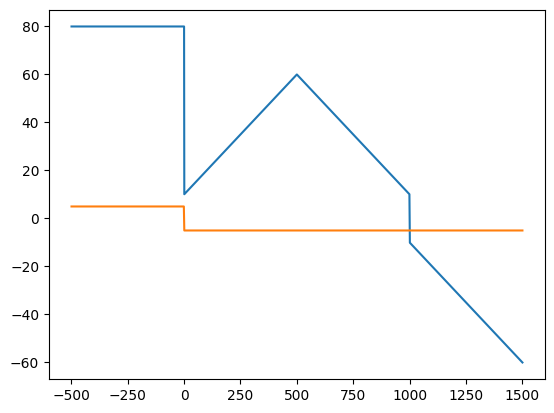

In [390]:
import matplotlib.pyplot as plt
x = list(range(1500, -500, -1))
y = []
for i in x:
    LEFT = i
    RIGHT = i
    y.append(move(80, 0, 10, 1000, 0.1, 0.0, 1, 1))
plt.plot(x, y)

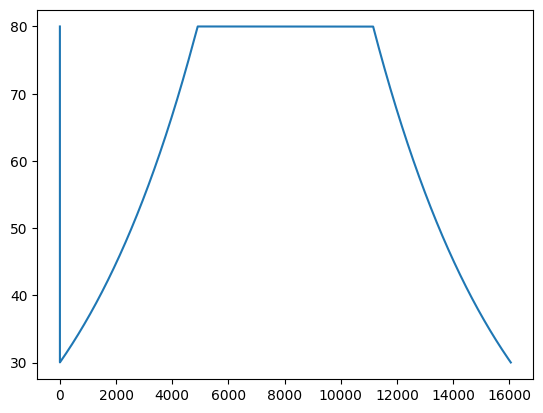

In [391]:
LEFT = 0
RIGHT = 0
newY = []
while LEFT<1000:
    moveVal = move(80, 80, 30, 1000, 0.2, 0.0, 1, 1)[0]
    newY.append(moveVal)
    LEFT+=moveVal/1000.0
    RIGHT = LEFT

x = list(range(len(newY)))
plt.plot(x, newY)